## 전자상거래 배송 데이터
**제품 배송 시간에 맞춰 배송되었는지 예측모델 만들기**

학습용 데이터 (X_train, y_train)을 이용하여 배송 예측 모형을 만든 후, 이를 평가용 데이터(X_test)에 적용하여 얻은 예측값을 다음과 같은 형식의 CSV파일로 생성하시오(제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

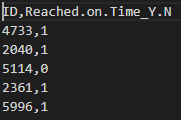

[시험용 데이터셋 만들기] 코드는 예시문제와 동일한 형태의 X_train, y_train, X_test 데이터를 만들기 위함임

(유의사항)

- 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, 피처엔지니어링, 분류알고리즘, 하이퍼파라미터 튜닝, 모형 앙상블 등이 수반되어야 한다.
- 수험번호.csv파일이 만들어지도록 코드를 제출한다.
- 제출한 모델의 성능은 ROC-AUC형태로 읽어드린다.

**[참고]작업형2 문구**
- 출력을 원하실 경우 print() 함수 활용
- 예시) print(df.head())
- getcwd(), chdir() 등 작업 폴더 설정 불필요
- 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

**데이터 파일 읽기 예제**
- import pandas as pd
- X_test = pd.read_csv("data/X_test.csv")
- X_train = pd.read_csv("data/X_train.csv")
- y_train = pd.read_csv("data/y_train.csv")

**사용자 코딩**

**답안 제출 참고**
- 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
- pd.DataFrame({'cust_id': X_test.cust_id, 'gender': pred}).to_csv('003000000.csv', index=False)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[target])

    
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../../dataset/e-commerce-shipping-data/Train.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='Reached.on.Time_Y.N', id_name='ID')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8799, 11), (2200, 11), (8799, 2), (2200, 2))

---
## My Code

---
## 풀이(Baseline)

##### EDA

In [2]:
# 제공된 3개 데이터 (y_test데이터 활용X)
X_train.shape, X_test.shape, y_train.shape

((8799, 11), (2200, 11), (8799, 2))

In [3]:
X_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
3999,4000,B,Ship,3,4,134,3,high,F,6,5680
9559,9560,F,Ship,4,3,173,3,medium,M,5,5331
2649,2650,B,Ship,2,1,192,3,high,M,46,3206
4843,4844,F,Ship,6,5,284,4,medium,M,8,5346
9601,9602,F,Flight,3,1,246,3,low,F,10,4707


In [4]:
y_train

,ID,Reached.on.Time_Y.N
3999,4000,0
9559,9560,1
2649,2650,1
4843,4844,1
9601,9602,1
...,...,...
3934,3935,0
2669,2670,1
1152,1153,1
6201,6202,0


In [5]:
# 레이블(타겟) 확인
y_train['Reached.on.Time_Y.N'].value_counts()

1    5251
0    3548
Name: Reached.on.Time_Y.N, dtype: int64

In [6]:
# X_train 결측치 확인
X_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [7]:
# 데이터 타입 확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8799 entries, 3999 to 9332
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8799 non-null   int64 
 1   Warehouse_block      8799 non-null   object
 2   Mode_of_Shipment     8799 non-null   object
 3   Customer_care_calls  8799 non-null   int64 
 4   Customer_rating      8799 non-null   int64 
 5   Cost_of_the_Product  8799 non-null   int64 
 6   Prior_purchases      8799 non-null   int64 
 7   Product_importance   8799 non-null   object
 8   Gender               8799 non-null   object
 9   Discount_offered     8799 non-null   int64 
 10  Weight_in_gms        8799 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 824.9+ KB


In [8]:
# object 타입 컬럼, 고유값 개수 확인
X_train[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']].nunique()

Warehouse_block       5
Mode_of_Shipment      3
Product_importance    3
Gender                2
dtype: int64

##### 데이터 전처리

In [9]:
# object 컬럼 삭제 (또는 라벨인코딩, 원핫인코딩)
# X_train = X_train.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)
# X_test = X_test.drop(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], axis=1)

from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

df = pd.concat([X_train, X_test])
cols = df.select_dtypes(include='object').columns

for col in cols:
    df[col] = encoder.fit_transform(df[col])
    
X_train = df[:X_train.shape[0]]
X_test = df[X_train.shape[0]:]
X_train.shape, X_test.shape

((8799, 11), (2200, 11))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 3999 to 4413
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
dtypes: int64(11)
memory usage: 1.0 MB


##### 모델 및 평가

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [12]:
X_train_id = X_train.pop('ID')
X_test_id = X_test.pop('ID')

In [13]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train['Reached.on.Time_Y.N'], test_size=0.2, random_state=2022)

In [14]:
# LogisticRegression
model = LogisticRegression()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
roc_auc_score(y_val, pred)

0.6216353014355234

In [15]:
# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
roc_auc_score(y_val, pred)

0.6362602128417889

In [16]:
# SVC
model = SVC()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
roc_auc_score(y_val, pred)

0.6498402941244229

In [17]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
roc_auc_score(y_val, pred)

0.6371525872080812

In [18]:
# RandomForestClassifier
model = RandomForestClassifier(random_state=2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
roc_auc_score(y_val, pred)

0.6780676469910655

In [19]:
# XGBClassifier
model = XGBClassifier(random_state=2022, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
roc_auc_score(y_val, pred)

0.6809385582970489

##### 모델 선택 및 결과 출력

In [20]:
model = XGBClassifier(random_state=2022, use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train['Reached.on.Time_Y.N'])
pred = model.predict(X_test)
pred

array([1, 1, 1, ..., 0, 1, 0])

In [21]:
submission = pd.DataFrame({
    'ID': X_test_id,
    'Reached.on.Time_Y.N': pred
})
submission.head()

,ID,Reached.on.Time_Y.N
4732,4733,1
2039,2040,1
5113,5114,1
2360,2361,1
5995,5996,0


In [22]:
submission.to_csv('submission.csv', index=False) # 수험번호.csv

##### 결과 체점 (수험자는 알 수 없는 부분임)

In [23]:
round(model.score(X_test, y_test['Reached.on.Time_Y.N']) * 100, 2)

64.0

In [24]:
roc_auc_score(y_test['Reached.on.Time_Y.N'], pred)

0.6463105636123928